In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [5]:
NUM_CLASSES = 25

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,657 (22.10 KB)

 Trainable params: 5,657 (22.10 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path + ".keras", verbose=1, save_weights_only=False)# Append .keras extension to the filepath to save the whole model
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
print(np.unique(y_dataset))  # Should print [0, 1, 2, 3, 4, 5]
unique, counts = np.unique(y_dataset, return_counts=True)
print(dict(zip(unique, counts)))  # Check if classes 4 and 5 are present

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
{0: 1125, 1: 932, 2: 1066, 3: 990, 4: 1356, 5: 902, 6: 1284, 7: 1227, 8: 1132, 9: 1129, 10: 993, 11: 1676, 12: 2057, 13: 1228, 14: 1027, 15: 1042, 16: 1472, 17: 1608, 18: 1300, 19: 2513, 20: 1992, 21: 1389, 22: 1128, 23: 1265, 24: 1327}


# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1456 - loss: 2.9098
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1465 - loss: 2.9062 - val_accuracy: 0.4905 - val_loss: 1.6601
Epoch 2/1000
190/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4278 - loss: 1.7248
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4293 - loss: 1.7202 - val_accuracy: 0.7480 - val_loss: 0.9819
Epoch 3/1000
192/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5714 - loss: 1.2771
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5717 - loss: 1.2760 - val_accuracy: 0.8580 - val_loss: 0.7114
Epoch 4/1000
192/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6290 - loss: 1.0775
Epoch 4: saving model to model/keypoint_classifier/

In [17]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.1124


In [18]:
# Loading the saved model
#model = tf.keras.models.load_model(model_save_path)

# Load the model
model = tf.keras.models.load_model(model_save_path + ".keras")

In [82]:
# Inference test
predict_result = model.predict(np.array([X_test[2]])) #o
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[9.9768229e-23 4.0960921e-14 7.1443836e-05 6.0301725e-20 1.1045841e-11
 2.6337288e-09 2.0711032e-11 6.3958532e-07 4.4980560e-08 5.9297349e-07
 5.0106988e-04 1.1546775e-04 2.7029706e-10 1.3611591e-04 9.9895006e-01
 7.2933688e-19 1.3843173e-04 1.2498854e-22 3.9996885e-06 1.4526812e-09
 8.8546619e-09 7.4909993e-05 4.6286422e-07 5.1654818e-12 6.7606929e-06]
14


# Confusion matrix

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


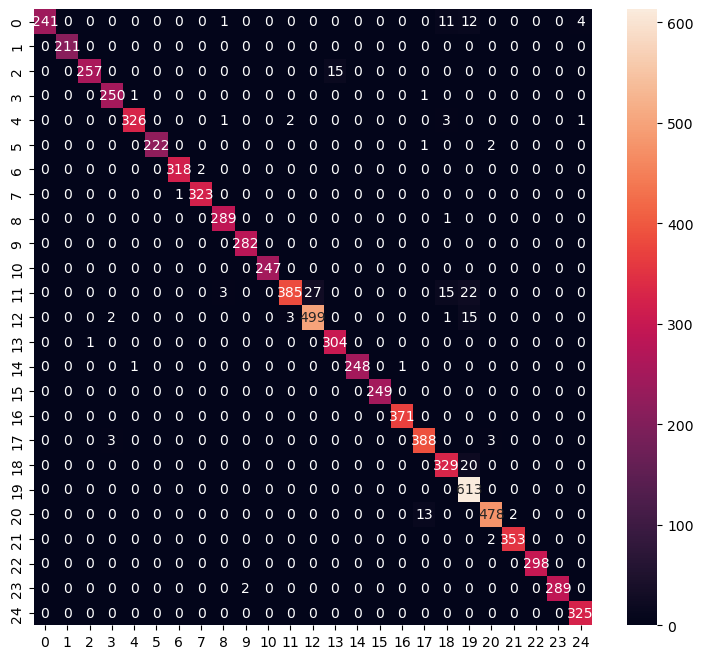

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       269
           1       1.00      1.00      1.00       211
           2       1.00      0.94      0.97       272
           3       0.98      0.99      0.99       252
           4       0.99      0.98      0.99       333
           5       1.00      0.99      0.99       225
           6       1.00      0.99      1.00       320
           7       0.99      1.00      1.00       324
           8       0.98      1.00      0.99       290
           9       0.99      1.00      1.00       282
          10       1.00      1.00      1.00       247
          11       0.99      0.85      0.91       452
          12       0.95      0.96      0.95       520
          13       0.95      1.00      0.97       305
          14       1.00      0.99      1.00       250
          15       1.00      1.00      1.00       249
          16       1.00      1.00      1.00       371
     

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(9, 8))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [23]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [24]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ACER\AppData\Local\Temp\tmpv2n0t22n\assets


INFO:tensorflow:Assets written to: C:\Users\ACER\AppData\Local\Temp\tmpv2n0t22n\assets


Saved artifact at 'C:\Users\ACER\AppData\Local\Temp\tmpv2n0t22n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 25), dtype=tf.float32, name=None)
Captures:
  2600146683664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2600146682512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2600146684240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2600146697680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2600146685776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2600146698064: TensorSpec(shape=(), dtype=tf.resource, name=None)


11720

# Inference test

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [27]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3.99 ms


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0746346e-14 4.3074155e-04 1.8892246e-05 1.4855722e-08 4.4788450e-08
 3.2837081e-05 1.0431191e-20 4.9431635e-12 2.1767382e-10 1.8945803e-21
 3.5322520e-10 1.8804276e-07 1.1840961e-16 1.0119081e-07 4.9310804e-09
 9.8312924e-08 3.2981267e-18 4.7002052e-11 8.3591016e-07 2.1743619e-20
 1.4236616e-11 2.7647475e-15 9.9951625e-01 6.3090039e-13 8.5549831e-18]
22
